# Capstone: Customer Demand Forecasting

**Notebook 3 - Contents**<br>
[Data Import](#Data-Import)<br>
[Summary Statistics](#Summary-Statistics)<br>
[Order Quantity vs Order Status](#Order-Quantity-vs-Order-Status)<br>
[Order Quantity vs Category](#Order-Quantity-vs-Category)<br>
[Order Quantity vs Price Discount and Age](#Order-Quantity-vs-Price-Discount-and-Age)<br>
[Distribution of Age](#Distribution-of-Age)<br>
[Trends of Total Order Quantity](#Trends-of-Total-Order-Quantity)<br>
[Trends of Top 5 Category](#Trends-of-Top-5-Category)<br>
[Seasonal Decomposition](#Seasonal-Decomposition)<br>
[Seasonality by Day of Week](#Seasonality-by-Day-of-Week)<br>
[Seasonality by Day of Month](#Seasonality-by-Day-of-Month)<br>
[Correlation Heatmap](#Correlation-Heatmap)<br>

## Data Import

Import libraries

In [1]:
import pandas as pd
import numpy as np
import pickle

import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose
import calendar
from datetime import datetime

Import pickle file

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
sales_df = pickle.load(open('../pkl/sales.pkl', 'rb'))

In [4]:
sales_df.shape

(286392, 34)

In [5]:
sales_df.head()

,order_id,order_status,item_id,sku,order_qty,price,value,discount_amount,total_value,category,payment_method,bi_st,cust_id,year,month,ref_num,title,first_name,middle_initial,last_name,gender,age,full_name,e_mail,sign_in_date,phone_num,place_name,county,city,state,zip,region,user_name,discount_percent
order_date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-10-01,100354678,received,574772,oasis_Oasis-064-36,21,89.9,1798.0,0.0,1798.0,Men's Fashion,cod,Valid,60124,2020,Oct-2020,987867,Drs.,Jani,W,Titus,F,43,"Titus, Jani",jani.titus@gmail.com,2006-08-22,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
2020-10-01,100354886,canceled,575170,GA_BS-11-136012,2,393.8,393.8,0.0,393.8,Women's Fashion,cod,Gross,16,2020,Oct-2020,517798,Mr.,Michal,I,Sturtevant,M,59,"Sturtevant, Michal",michal.sturtevant@btinternet.com,1995-10-06,803-374-2594,Greenville,Greenville,Greenville,SC,29606,South,misturtevant,0.0
2020-10-01,100354884,complete,575168,NN_Crystal Jelly Orange 80g,11,5.5,55.0,0.0,55.0,Soghaat,cod,Net,60201,2020,Oct-2020,175282,Hon.,Sol,W,Nehls,M,34,"Nehls, Sol",sol.nehls@hotmail.co.uk,1994-08-01,303-314-4005,Padroni,Logan,Padroni,CO,80745,West,swnehls,0.0
2020-10-01,100354884,complete,575167,Uni-Dove-Lux-deal,11,44.0,440.0,0.0,440.0,Superstore,cod,Net,60201,2020,Oct-2020,175282,Hon.,Sol,W,Nehls,M,34,"Nehls, Sol",sol.nehls@hotmail.co.uk,1994-08-01,303-314-4005,Padroni,Logan,Padroni,CO,80745,West,swnehls,0.0
2020-10-01,100354883,complete,575166,MTA_1032,2,35.0,35.0,0.0,35.0,Mobiles & Tablets,customercredit,Net,55314,2020,Oct-2020,262383,Mrs.,Suzanne,Q,Dicarlo,F,60,"Dicarlo, Suzanne",suzanne.dicarlo@gmail.com,2002-09-29,209-810-7484,Irvine,Irvine,Irvine,CA,92730,West,sqdicarlo,0.0


In [6]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 286392 entries, 2020-10-01 to 2021-09-30
Data columns (total 34 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   order_id          286392 non-null  int64         
 1   order_status      286392 non-null  object        
 2   item_id           286392 non-null  int64         
 3   sku               286392 non-null  object        
 4   order_qty         286392 non-null  int64         
 5   price             286392 non-null  float64       
 6   value             286392 non-null  float64       
 7   discount_amount   286392 non-null  float64       
 8   total_value       286392 non-null  float64       
 9   category          286392 non-null  object        
 10  payment_method    286392 non-null  object        
 11  bi_st             286392 non-null  object        
 12  cust_id           286392 non-null  int64         
 13  year              286392 non-null  int64   

## EDA

### Summary Statistics

Numeric features

In [7]:
sales_df.describe().round()

,order_id,item_id,order_qty,price,value,discount_amount,total_value,cust_id,year,ref_num,age,discount_percent
count,2.863920e+05,286392.0,286392.0,286392.0,286392.0,286392.0,286392.0,286392.0,286392.0,286392.0,286392.0,286392.0
mean,1.004727e+08,741665.0,3.0,851.0,886.0,70.0,816.0,70048.0,2021.0,560854.0,46.0,0.0
std,3.781241e+06,95746.0,5.0,1742.0,2073.0,257.0,1984.0,30244.0,0.0,255828.0,17.0,0.0
min,1.003547e+08,574769.0,1.0,0.0,0.0,0.0,0.0,4.0,2020.0,111127.0,18.0,0.0
25%,1.004046e+08,659684.0,2.0,50.0,50.0,0.0,50.0,56519.0,2020.0,341265.0,32.0,0.0
50%,1.004518e+08,742309.0,2.0,119.0,159.0,0.0,150.0,74226.0,2021.0,564857.0,47.0,0.0
75%,1.005134e+08,826124.0,3.0,950.0,910.0,18.0,800.0,92357.0,2021.0,781086.0,61.0,0.0
max,1.005494e+09,905208.0,501.0,101263.0,101263.0,30213.0,101263.0,115326.0,2021.0,999981.0,75.0,1.0


Categorical features

In [8]:
sales_df.describe(include=object).T

,count,unique,top,freq
order_status,286392,13,canceled,112166
sku,286392,47932,MATSAM59DB75ADB2F80,3775
category,286392,15,Mobiles & Tablets,61761
payment_method,286392,13,cod,102916
bi_st,286392,3,Gross,112333
month,286392,12,Dec-2020,82528
title,286392,7,Mr.,103506
first_name,286392,5161,Joel,2895
middle_initial,286392,26,U,13135
last_name,286392,18208,Gonzalez,2543


Descriptive Analysis from Summary of Statistics above:
1. The order quantity is low at average of 3 units, with maximum at 501 units. This means the business might have spikes in sales probably due to promotions or holiday season which to be explored in details.
2. Price on average is pretty high at \\$851 with relatively significant std \\$1,742 and maximum price hit $101,263.  That explains the low unit sold.
3. Discount amount on average is relatively low, with mean \\$70 and std \\$257.  Max \\$30,213 presumably for high value item as observed in pricing.
4. This dataset covers only 12 months from Oct-2020 to Sep-2021.
5. Age of customer on average 46 years old which is aligned with the mean 47 y/o.  The demographics of customers for this business are made up of matured adults with high purchasing power, likely focus on quality over quantity, which explains the high value pricing of product sold.  More deep-dive into customer demographics would provide direction for company's marketing strategy and product mix planning.
6. There are 13 types of order status hence I need to deep dive to check which constitute to completed sales.
7. There are 47,932 types of SKU indicating massive products database commonly seen in company that have grown over a period of time. SKU [(_Stock Keeping Unit_)](https://www.netsuite.com/portal/resource/articles/inventory-management/stock-keeping-unit-SKU.shtml#:~:text=A%20SKU%2C%20or%20stock%20keeping%20unit%2C%20is%20a%20sequence%20of%20numbers%20and%20characters%20used%20as%20an%20internal%20tracking%20tool%20by%20businesses%20to%20track%20inventory.%20Here%2C%20we%E2%80%99ll%20discuss%20more%20details%20about%20what%20a%20SKU%20is%2C%20why%20a%20SKU%20system%20is%20important%20and%20how%20you%20can%20put%20it%20to%20work%20for%20your%20business.) refers to unique identifier assigned to a product for inventory management and tracking.   Management by SKU is essential as it helps with store layouts, multi-channel listings, invoicing and orders tracking.
8. Massive list of SKUs are grouped under category based on similar product features. This business manages __15 categories__ with Mobiles and Tablets being their top seller.  The ideal state is to be able to fit product category into machine learning all at once.  However each product category has its unique demand seasonality, purchasing patterns (buy in bulk or small quantity), sourcing requirement and customer clusters. Hence it is better to start small with forecasting one product category.  *_My aim is to select category with most movement and/or highest sales revenues for the interest of this project._ 
9. The availability of various payment methods provide convenience and options to customer, hence has a impact on driving sales demand.
10. The business has large customer base of 64,000 as indicated under "Full Name". Successful customer relationship management enables cross-selling and up-selling, which can be faciliated by machine learning __Recommender System__ whereby customer ratings can provide informative feedback.  This is part of future work.
11. As this is US online sales dataset, there are 51 states in the US with 15,892 citites and 33,773 zipcodes.  Business can leverage on such level of details to deepdive **location analysis study** to drive targeted promotions and product development. Looking into the future to identity any future events that are location-specific can help drive demand for specific product.   

### Order Quantity vs Order Status

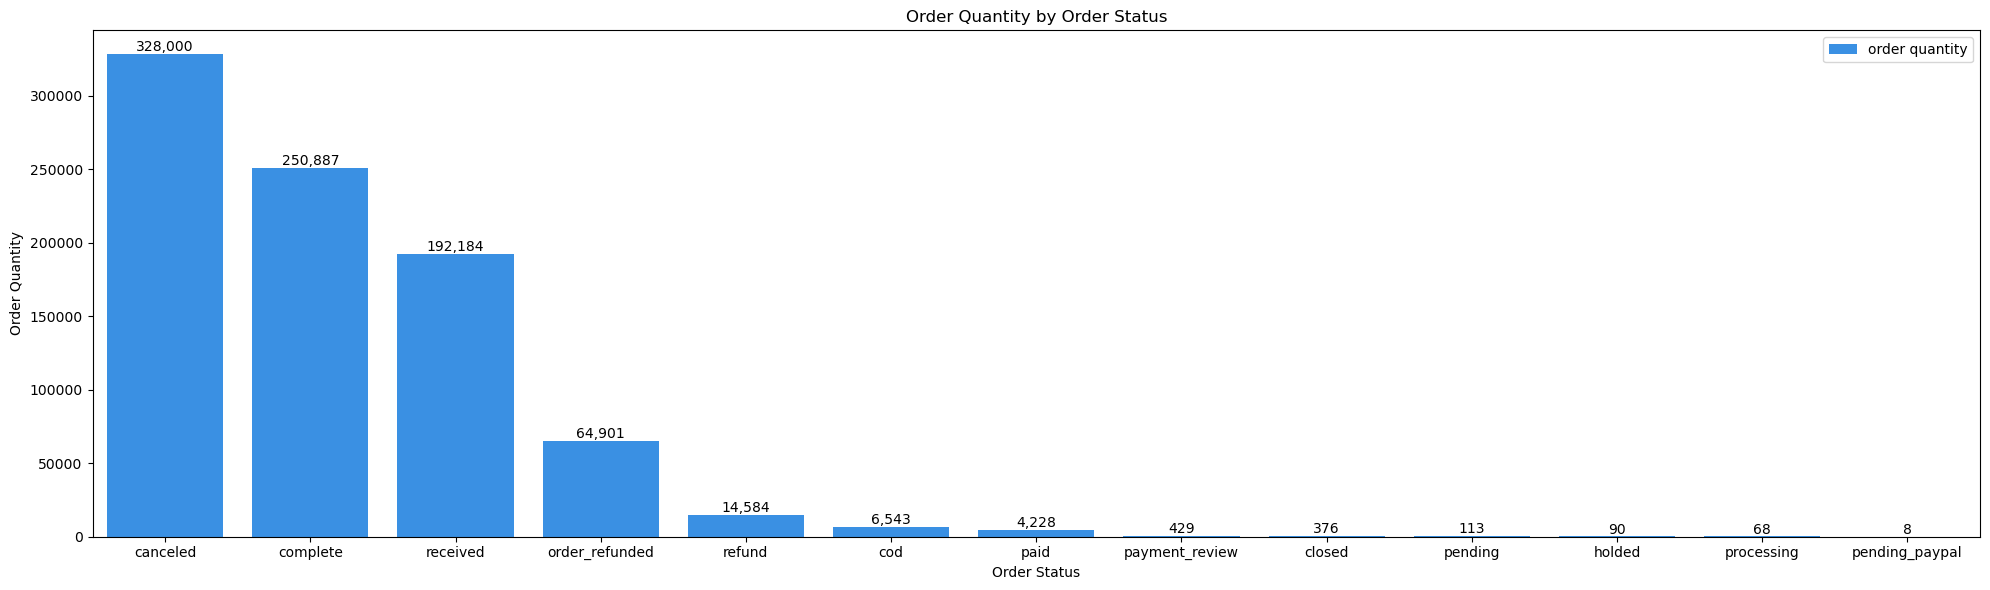

In [9]:
# Group the order quantity by order status
order_status = sales_df.groupby('order_status')['order_qty'].sum().reset_index().sort_values(by='order_qty',ascending=False)

# Plot in a bar chart
plt.figure(figsize=(20, 6))
ax = sns.barplot(data=order_status, x='order_status', y='order_qty', 
                 color='dodgerblue', label='order quantity')
plt.title("Order Quantity by Order Status")
plt.xlabel("Order Status")
plt.ylabel("Order Quantity")
plt.legend()
plt.tight_layout()

# Add actual numbers on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}', (p.get_x() + p.get_width() / 2.,
                                           p.get_height()), ha='center', va='center', xytext=(0, 5),
                textcoords='offset points', fontsize=10, color='black')

1. Per observation on the above barchart, majority of the online orders are "canceled", "complete" or "received".  Based on [e-commerce research](https://support.bigcommerce.com/s/article/Order-Statuses?language=en_US#:~:text=Completed%20%E2%80%94%20Order%20has%20been%20shipped/picked%20up%2C%20and%20receipt%20is%20confirmed%3B%20client%20has%20paid%20for%20their%20digital%20product%2C%20and%20their%20file(s)%20are%20available%20for%20download), 'complete' means the orders have been delivered and customer receipt is confirmed. Hence this is the focus for my study. 
2. For future works, if we are able to extract customer reasons for "cancellation" then we could perform NLP Sentiment Analysis because the loss of business is significant. 
3. "Received" status is not clearly stated hence I assume it means product received but payment not yet completed. 
4. Amazon seller center website do not have such information on order status terminology hence another bigcommerce website is used as reference.

### Order Quantity vs Category

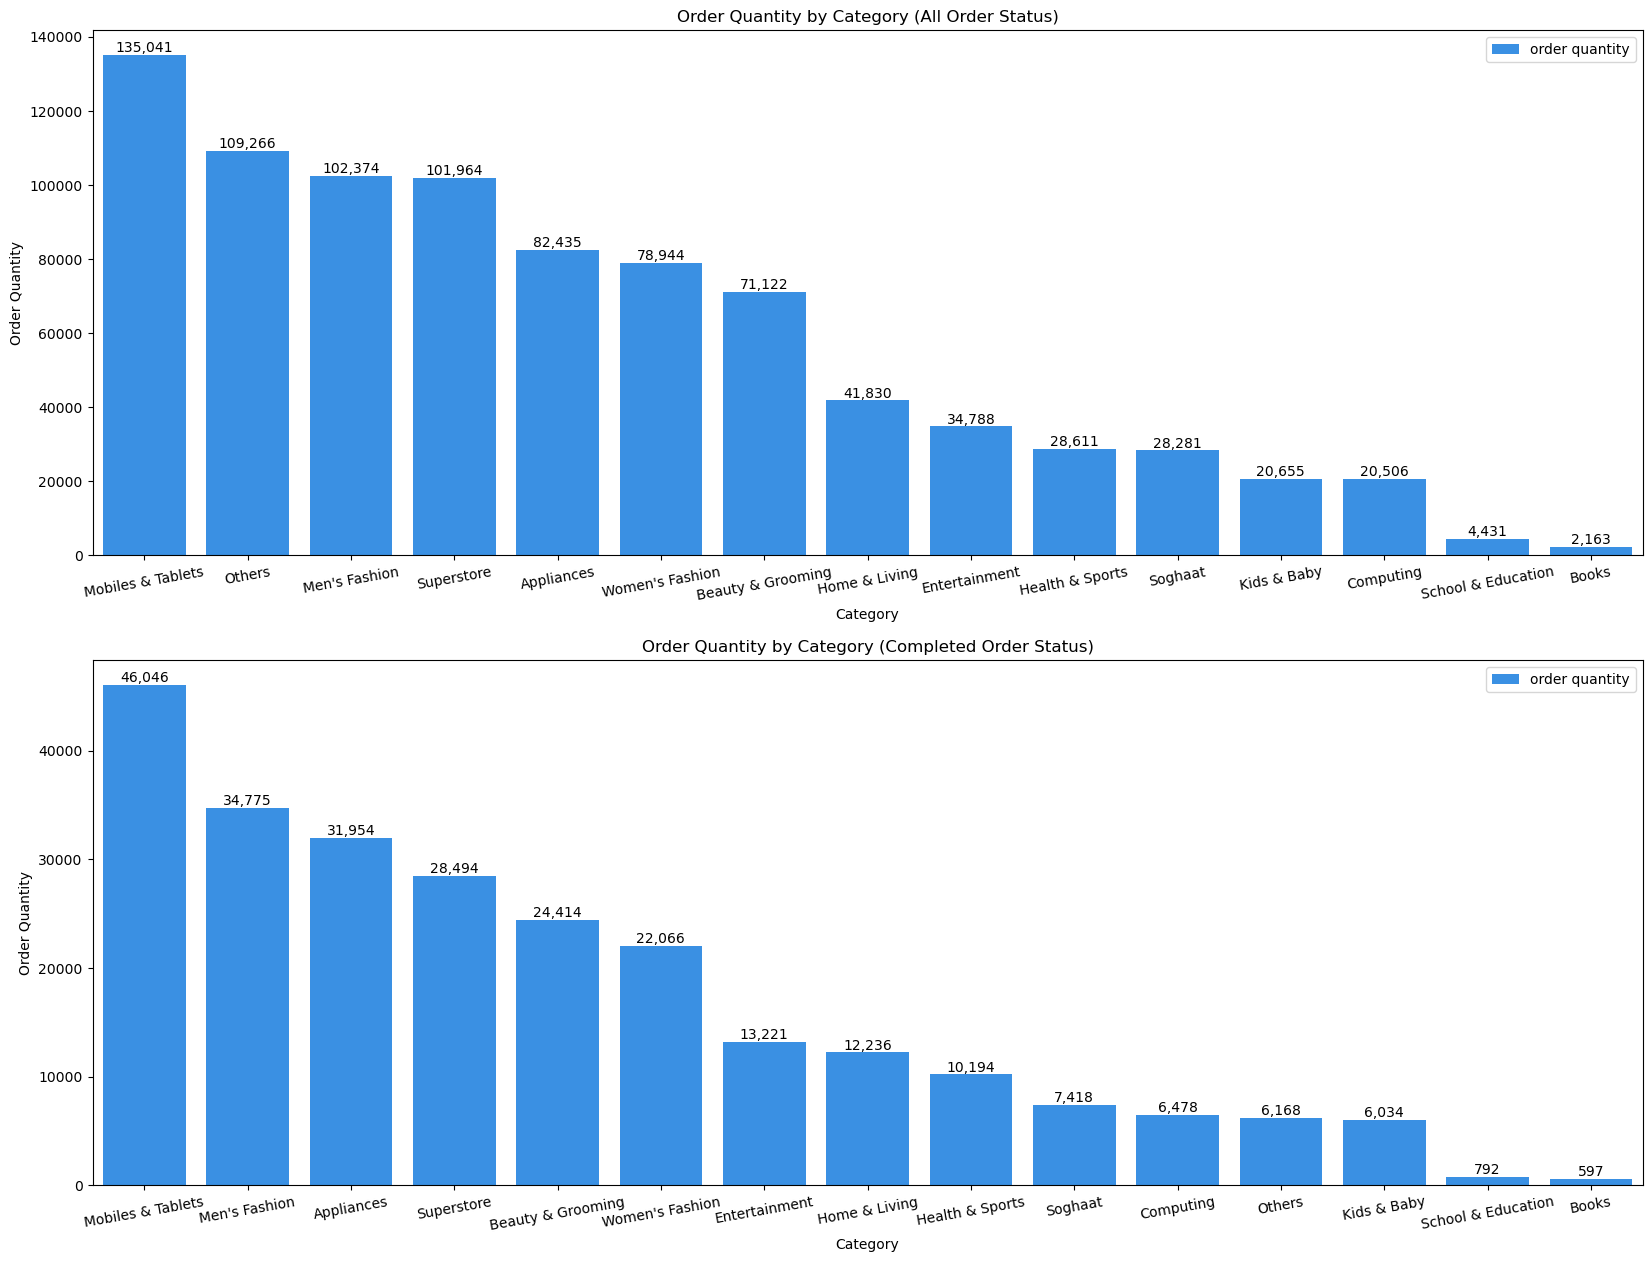

In [10]:
# Group the order quantity by product category for all order statuses
category1 = sales_df.groupby('category')['order_qty'].sum().reset_index().sort_values(by='order_qty',ascending=False)

# Group the order quantity by product category for completed orders only
completed_sales = sales_df[sales_df['order_status']=='complete']
category2 = completed_sales.groupby('category')['order_qty'].sum().reset_index().sort_values(by='order_qty',ascending=False)

# Plot in a bar chart
fig, axes = plt.subplots(2,1, figsize=(20, 15))

sns.barplot(data=category1, x='category', y='order_qty', 
                 color='dodgerblue', label='order quantity', ax=axes[0])
axes[0].set_title("Order Quantity by Category (All Order Status)")
axes[0].set_xlabel("Category")
axes[0].set_ylabel("Order Quantity")
axes[0].legend()
axes[0].tick_params(axis='x', rotation=10)

# Add actual numbers on top of the bars
for p in axes[0].patches:
    axes[0].annotate(f'{p.get_height():,.0f}', (p.get_x() + p.get_width() / 2.,
                                           p.get_height()), ha='center', va='center', xytext=(0, 5),
                textcoords='offset points', fontsize=10, color='black')

# Plot 2nd graph in a bar chart
sns.barplot(data=category2, x='category', y='order_qty', 
                 color='dodgerblue', label='order quantity', ax=axes[1])
axes[1].set_title("Order Quantity by Category (Completed Order Status)")
axes[1].set_xlabel("Category")
axes[1].set_ylabel("Order Quantity")
axes[1].legend()
axes[1].tick_params(axis='x', rotation=10)

# Add actual numbers on top of the bars
for p in axes[1].patches:
    axes[1].annotate(f'{p.get_height():,.0f}', (p.get_x() + p.get_width() / 2.,
                                           p.get_height()), ha='center', va='center', xytext=(0, 5),
                textcoords='offset points', fontsize=10, color='black')


1. Per observations on above barcharts, Mobiles & Tablets leads the sales chart in term of order quantity for all order statuses and completed sales orders. It made up of 46,046 order quantity out of 250,887 total completed orders which constitutes to 18%. 
2. Men's Fashion ranks second place, takes up 14% of total completed orders.
3. Appliances made up of 13% of total completed orders.
4. These top 3 product categories, in aggregate, made up of 45% of total completed orders, which is almost half the order quantity.  Hence this warrant attention and efforts in demand planning by focusing at top 3 categories.

### Order Quantity vs Price Discount and Age

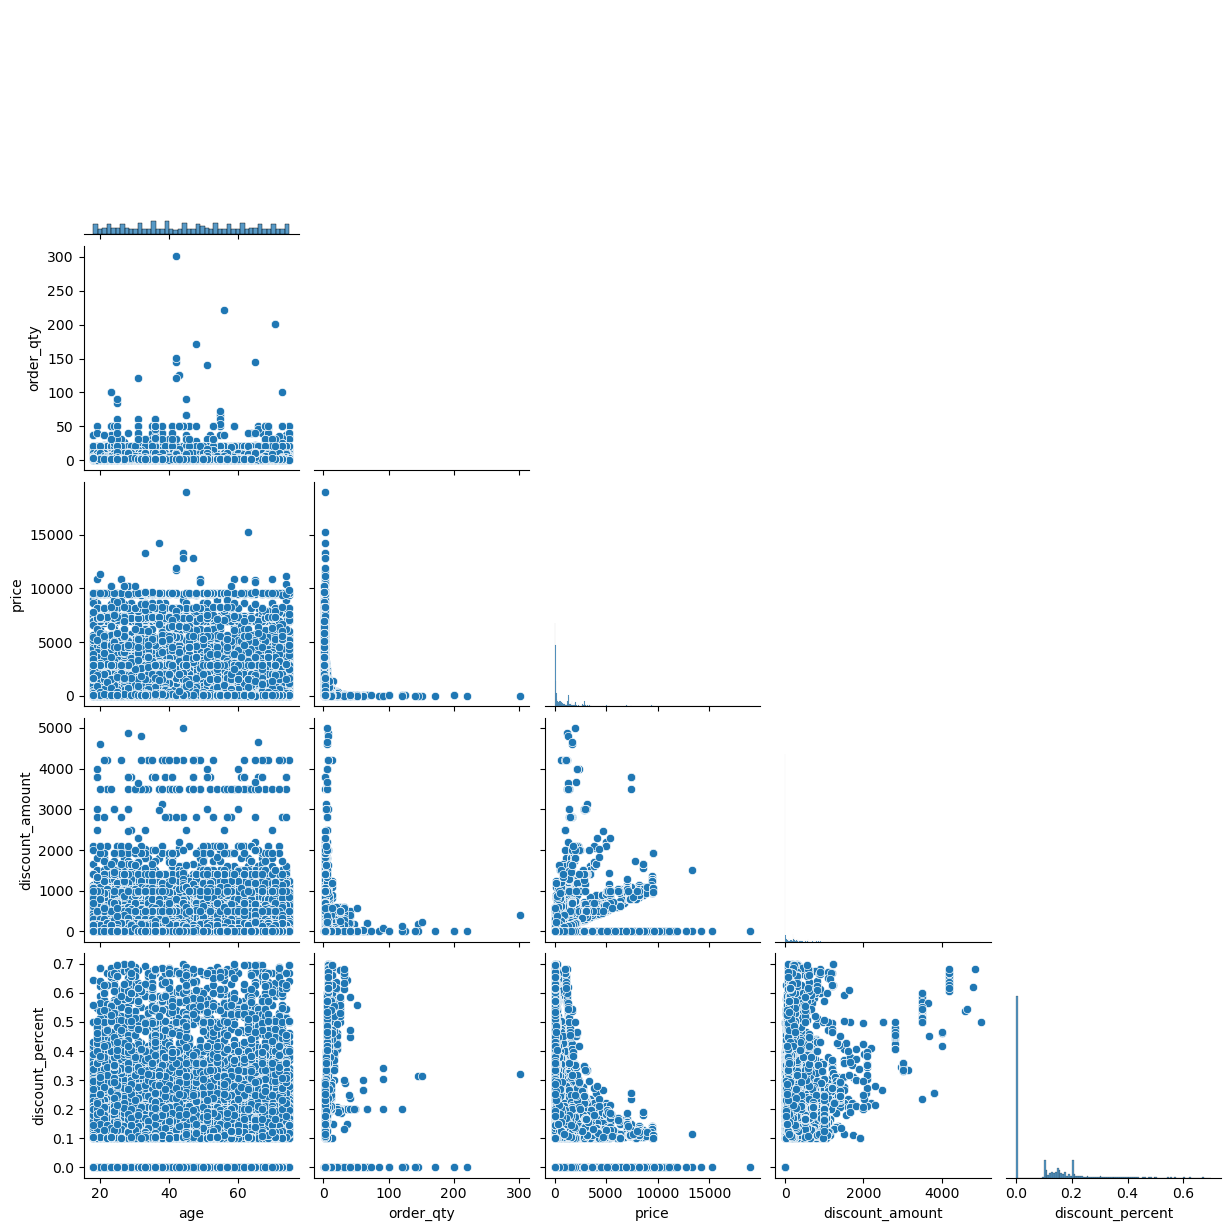

In [30]:
# Plotting to see relationship for all category
sns.pairplot(completed_sales[['age','order_qty', 'price','discount_amount','discount_percent']], corner=True);

- Based on above plots, there is no relationship identified between order quantity versus age, price and discount.

### Distribution of Age

In [12]:
# Group the order quantity by age
sales_by_age = completed_sales[['order_qty','category','age']]

# Select the top 5 categories
selected_category = ["Mobiles & Tablets","Men's Fashion","Appliances","Superstore","Beauty & Grooming"]
topsales_by_age = sales_by_age[sales_by_age['category'].isin(selected_category)]

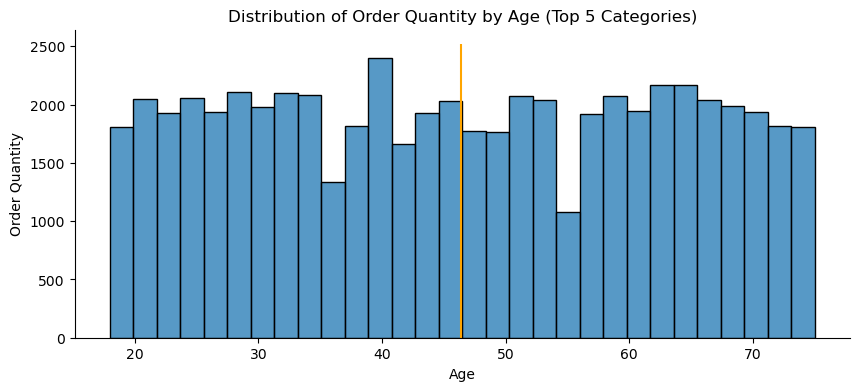

In [13]:
# Histogram to show distribution of age
plt.figure(figsize=(10,4))

sns.histplot(data=topsales_by_age, x='age', bins=30)
plt.xlabel('Age')
plt.ylabel('Order Quantity')

ymin1, ymax1 = plt.ylim()
plt.vlines(x=np.mean(topsales_by_age['age']), ymin = ymin1, ymax = ymax1, color='orange')

plt.title(f'Distribution of Order Quantity by Age (Top 5 Categories)')
sns.despine()
plt.show()

- Mean age of customer group is 46 years old, which is very close to median age of 47 years old. 
- The distribution of age is not normally distributed for the top 5 product categories.  The demand by customer distribution is relatively equal across all age groups.
- The biggest order quantity comes from age group of 40 years old.
- Lowest order quantity derived from age group 55 years old.
- No prominent customer demand patterns are identified from the histogram above, as the product mix looks the same throughout all age groups.

### Trends of Total Order Quantity

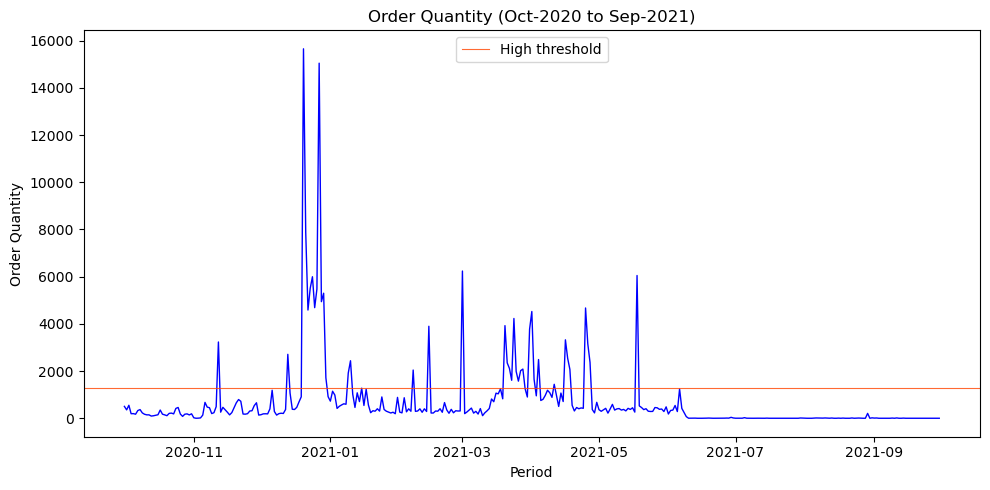

In [14]:
# Group by datetime and resampled to 365 days to plot overall trend
new_index = pd.date_range(start='2020-10-01', end='2021-09-30', freq='D')
completed_daily = completed_sales['order_qty'].resample('D').sum().reindex(new_index, fill_value=0)

# Set high threshold to identify outliers
high_threshold = completed_daily.quantile(0.75) + (1.5 * (completed_daily.quantile(0.75) - completed_daily.quantile(0.25)))

# Plot overall trend
plt.figure(figsize=(10, 5))

sns.lineplot(data=completed_daily, linewidth=1, color='blue')
plt.axhline(high_threshold, label='High threshold', linewidth=0.8, alpha=0.8, color='orangered')

plt.title("Order Quantity (Oct-2020 to Sep-2021)")
plt.xlabel("Period")
plt.ylabel("Order Quantity")
plt.legend(loc='upper center', fontsize='10')

plt.tight_layout();

1. As observed from above linegraph, there are a couple of **outliers** (based on high threshold set at 1,299 units), particularly the **peak** occur around last week of 2020-12, which in all likelihood, driven by Christmas and Thanksgiving festive season. 
2. Another few outliers (smaller peaks) happen on 2021-03 and 2021-05, also some time between mid 2021-03 to end 2021-04.
3. Low demand (almost **flatline**) are seen in 2020-10 and from mid 2021-06 till the end 2021-09, probably is common for this particular online reseller to experience such cyclical business pattern. 

### Trends of Top 5 Category

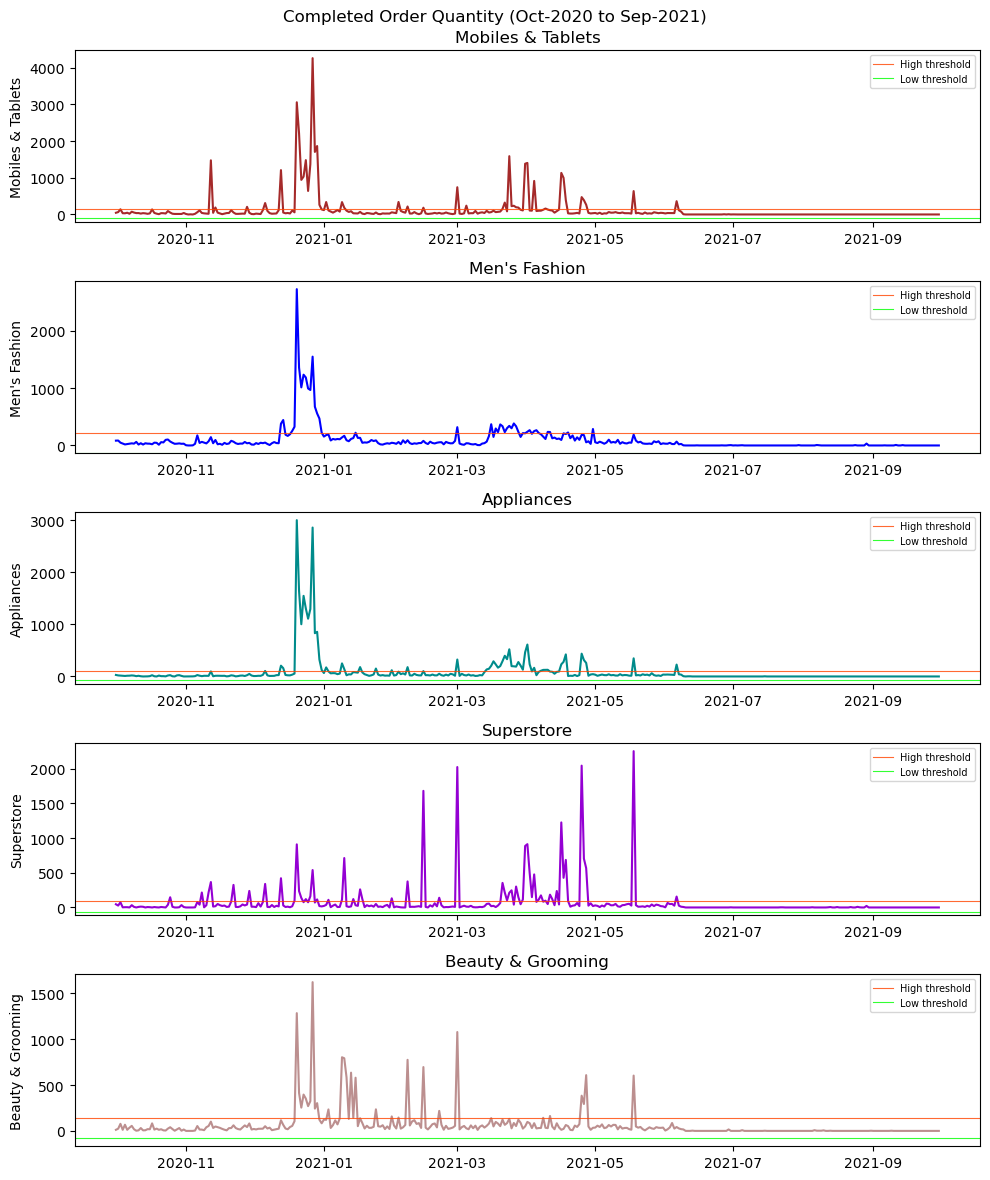

In [15]:
# Group by category
category_sales = pd.pivot_table(completed_sales, values='order_qty', index='order_date', columns='category', aggfunc='sum')

# Further reinde to full 365 days for plotting
category_sales = category_sales.reindex(new_index, fill_value=0)
category_sales.fillna(value=0,inplace=True)

# Select top 5 category for plotting because putting all categories in one plot rendered it unable to see trends
colors = ['brown','blue','darkcyan','darkviolet','rosybrown']

f, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5,1, figsize=(10,12))

for ax, cat, color in zip((ax1, ax2, ax3, ax4, ax5), selected_category, colors):
    sns.lineplot(ax=ax, data=category_sales[cat], color=color)
    ax.axhline(category_sales[cat].quantile(0.75) + (1.5 * (category_sales[cat].quantile(0.75) - category_sales[cat].quantile(0.25))),
               label='High threshold', linewidth=0.8, alpha=0.8, color='orangered')
    ax.axhline(category_sales[cat].quantile(0.25) - (1.5 * (category_sales[cat].quantile(0.75) - category_sales[cat].quantile(0.25))),
               label='Low threshold', linewidth=0.8, alpha=0.8, color='lime')
    ax.set_title(cat)
    ax.legend(loc='upper right', fontsize='x-small')

plt.suptitle('Completed Order Quantity (Oct-2020 to Sep-2021)')
plt.tight_layout()

- The linegraphs of top 5 categories show different trends.
- The top 3 categories (Mobiles & Tablets, Men's Fashion, and Appliances) follows similar trends as the overall trends, particularly the peak in Dec-2020.
- All of the top 5 categories exhibits similar flat demand from mid June-2021 onwards.

### Seasonal Decomposition

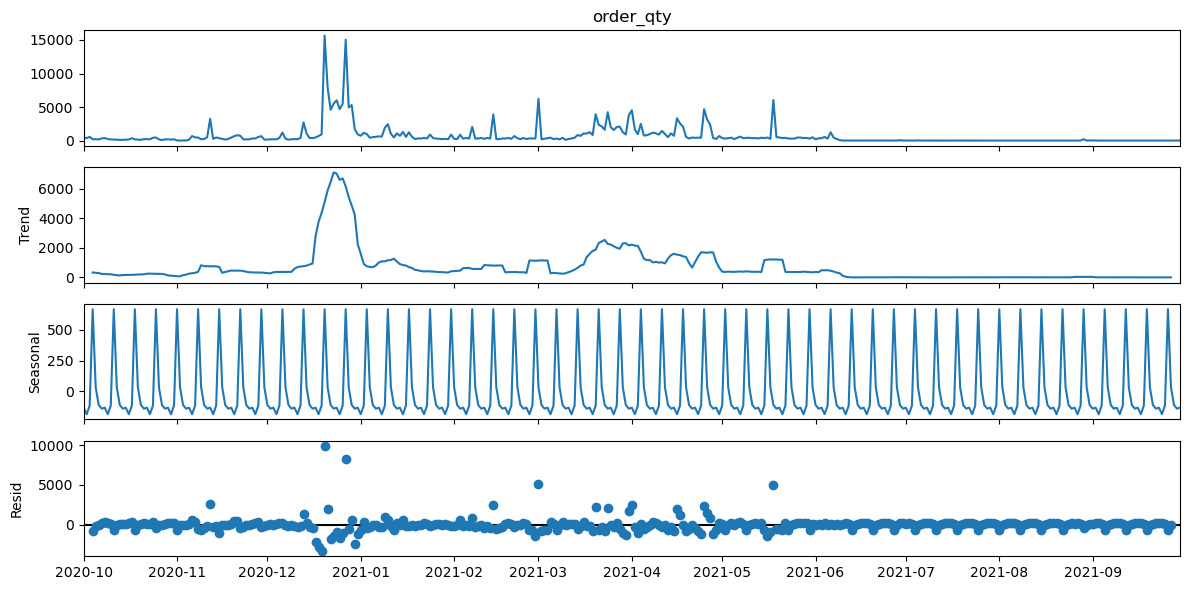

In [16]:
decomposition = seasonal_decompose(x=completed_daily, model='addicitve')

# Plot the decomposition
fig = decomposition.plot()
fig.set_size_inches((12,6))
fig.tight_layout();

From the seasonal decomposition plot, we are able to observe the following:

1) Trend is not linear, instead it is a series of peaks and lulls
2) Seasonality is visible within a month. Width between cycles is a week looking at peak-to-peak and trough-to-trough. 
3) Residuals are unusually high during end Dec-2020 when there was a peak in the last 2 weeks of the month, and also smaller peak in Mar-2021 and mid May-2021.

### Seasonality by Day of Week

In [17]:
# Group by category
seasonal = completed_sales[['order_qty','category','month']]

# Filtered the top 5 categories
seasonal = seasonal[seasonal['category'].isin(selected_category)]

# Extract the day of the week (0 = Monday, 1 = Tuesday,.... 6 = Sunday)
seasonal['day_of_week'] = seasonal.index.weekday

# Map day of the week to their corresponding name
weekday_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
seasonal['day_name'] = seasonal['day_of_week'].apply(lambda x: weekday_names[x])

# Group the data by day of the week and calculate the total order quantity for each day
day_of_week_order = seasonal.groupby('day_of_week')['order_qty'].sum().reindex(range(7))

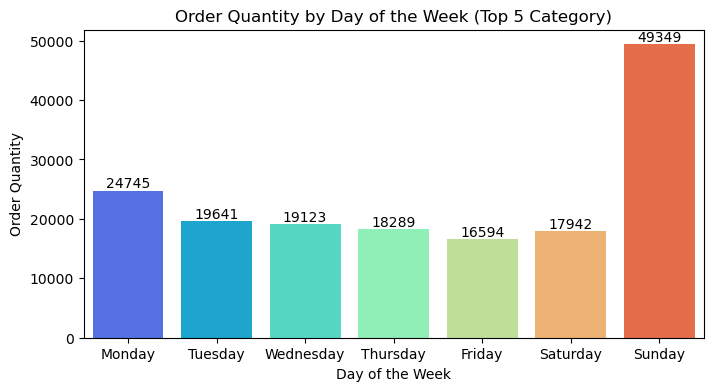

In [27]:
# Plot order quantity by day of the week sequentially
plt.figure(figsize=(8, 4))
ax = sns.barplot(x=day_of_week_order.index, y=day_of_week_order.values, order=range(7), palette='rainbow')
plt.xlabel('Day of the Week')
plt.ylabel('Order Quantity')
plt.title('Order Quantity by Day of the Week (Top 5 Category)')
plt.xticks(range(7), weekday_names)  # Set x-axis labels to weekday names

# Add actual numbers on top of the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2.,
                                           p.get_height()), ha='center', va='center', xytext=(0, 5),
                textcoords='offset points', fontsize=10, color='black')
plt.show()

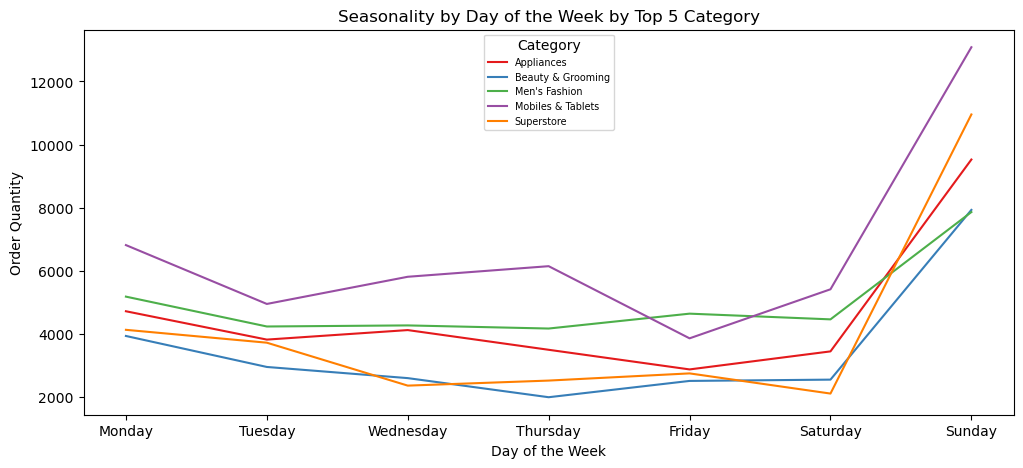

In [19]:
# Group the data by day of the week and category and calculate the total order quantity for each day
day_of_week_order2 = seasonal.groupby(['day_of_week', 'category'])['order_qty'].sum().reset_index()

# Plot seasonality by day of the week by category
plt.figure(figsize=(12, 5))
sns.lineplot(data=day_of_week_order2, x='day_of_week', y='order_qty', hue='category',palette='Set1')
plt.xlabel('Day of the Week')
plt.ylabel('Order Quantity')
plt.title('Seasonality by Day of the Week by Top 5 Category')
plt.xticks(range(7), weekday_names)  # Set x-axis labels to weekday names
plt.legend(title='Category', loc='upper center', fontsize='x-small')
plt.show()

From the Day of Week seasonality plots above:
1. Top 5 Category has highest order quantity on Sundays and lowest orders on Fridays.
2. Sundays are non-working days for most people hence they have the time browsing online catalogs and place orders.
3. Top 5 categories experienced lowest orders on Fridays due to people may socialise to wrap up the working weeks hence spend time off from online shopping.

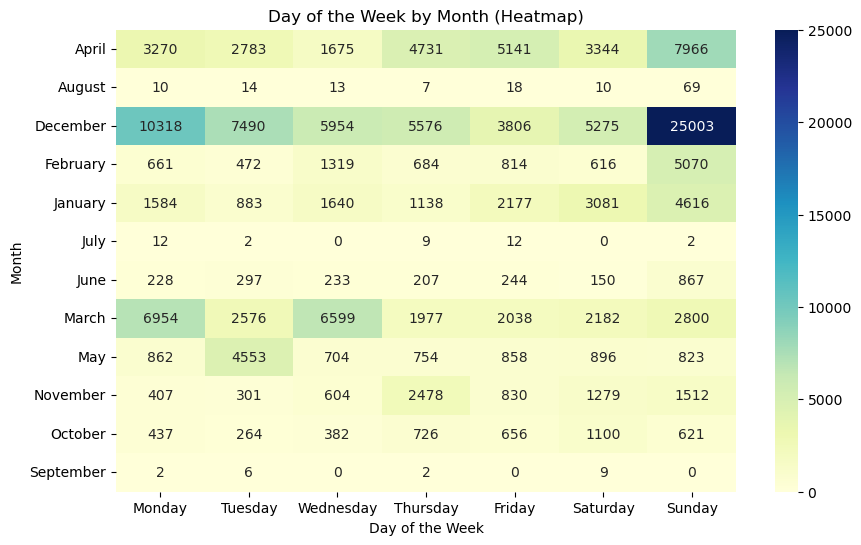

In [20]:
# Convert the 'month' column to datetime and extract the month
seasonal['month'] = seasonal['month'].apply(lambda x: pd.to_datetime(x).strftime('%B'))

#  Group the order quantity by month and day of the week and calculate total order quantity by day
day_of_week_order3 = seasonal.groupby(['month', 'day_of_week'])['order_qty'].sum().unstack().fillna(0)

# Define the order of months (sequence)
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(day_of_week_order3, cmap='YlGnBu', annot=True, fmt='g', xticklabels=weekday_names, yticklabels=True)
plt.xlabel('Day of the Week')
plt.ylabel('Month')
plt.title('Day of the Week by Month (Heatmap)')
plt.show()


1. From heatmap ahove, we noticed high order quantity in Sundays of December hence high positive correlation between Sundays and December.
2. Mondays in December also exhibit relatively strong correlation with each other.
3. December is generally a hot month for online sales.
4. Mondays and Wednesday in March are another relatively popular days for customer to browse and order.
5. The correlation of order quantity with other days of week and month are weak. 

### Seasonality by Day of Month

In [21]:
# Extract the day of the week (0 = Monday, 1 = Tuesday,.... 6 = Sunday)
seasonal['day_of_month'] = seasonal.index.day

# Group the data by day of the month and category, and calculate the total order quantity for each day
day_of_month_order = seasonal.groupby('day_of_month')['order_qty'].sum().reset_index()

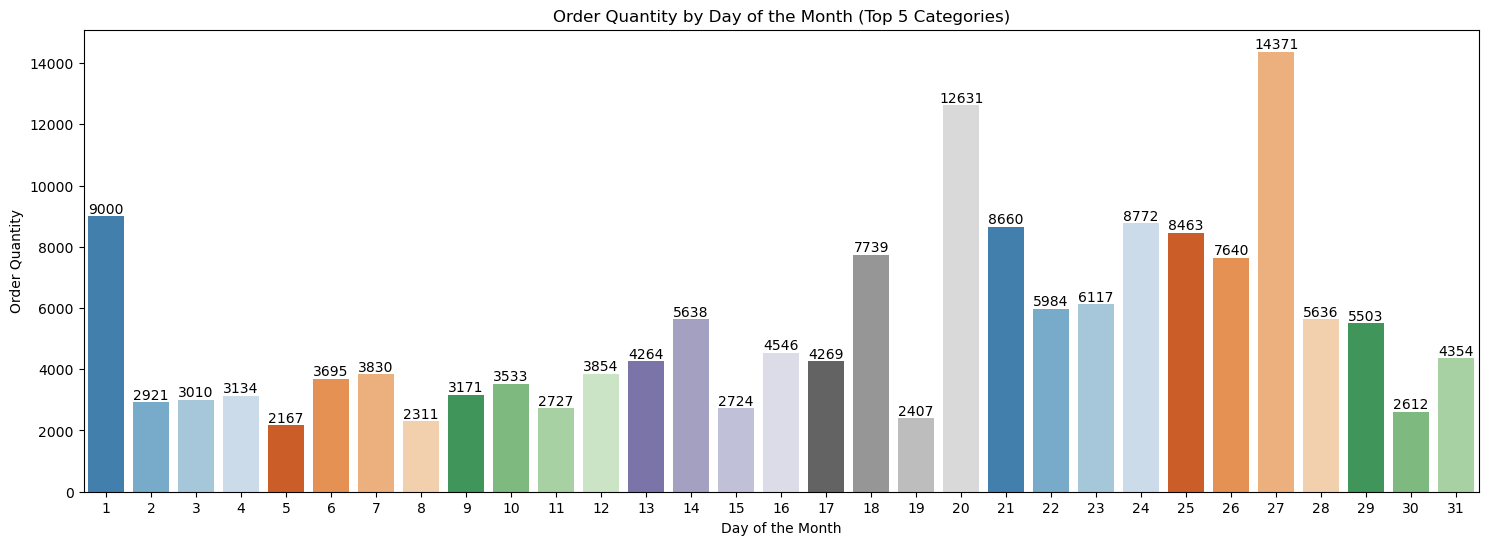

In [22]:
# Plot order quantity by day of the week sequentially
plt.figure(figsize=(18, 6))
ax = sns.barplot(x=day_of_month_order['day_of_month'], y=day_of_month_order['order_qty'], palette='tab20c')
plt.xlabel('Day of the Month')
plt.ylabel('Order Quantity')
plt.title('Order Quantity by Day of the Month (Top 5 Categories)')

# Add actual numbers on top of the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2.,
                                           p.get_height()), ha='center', va='center', xytext=(0, 5),
                textcoords='offset points', fontsize=10, color='black')
plt.show()


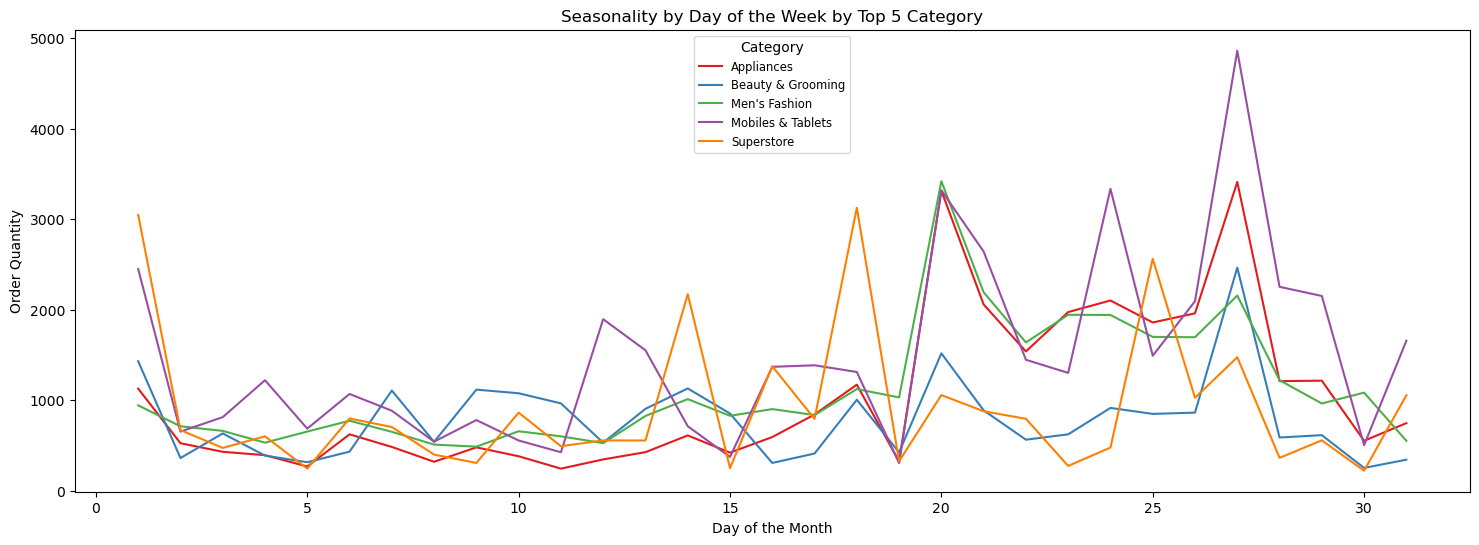

In [23]:
# Group the data by day of the week and category and calculate the total order quantity for each day
day_of_month_order2 = seasonal.groupby(['day_of_month', 'category'])['order_qty'].sum().reset_index()

# Plot seasonality by day of the week by category
plt.figure(figsize=(18, 6))
sns.lineplot(data=day_of_month_order2, x='day_of_month', y='order_qty', hue='category',palette='Set1')
plt.xlabel('Day of the Month')
plt.ylabel('Order Quantity')
plt.title('Seasonality by Day of the Week by Top 5 Category')
plt.legend(title='Category', loc='upper center', fontsize='small')
plt.show()


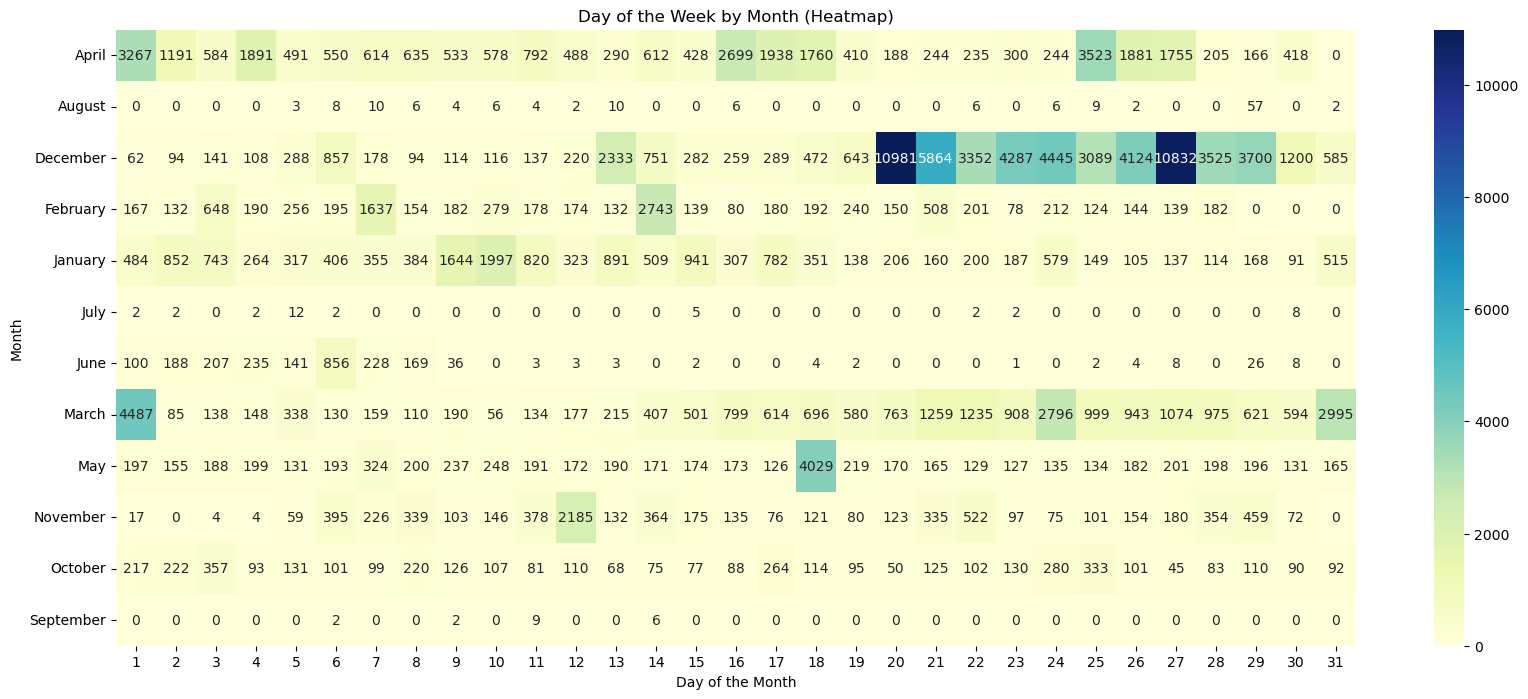

In [24]:
#  Group the order quantity by month and day of the week and calculate total order quantity by day
day_of_month_order3 = seasonal.groupby(['month', 'day_of_month'])['order_qty'].sum().unstack().fillna(0)

# Create a heatmap
plt.figure(figsize=(20, 8))
sns.heatmap(day_of_month_order3, cmap='YlGnBu', annot=True, fmt='g', xticklabels='auto', yticklabels=True)
plt.xlabel('Day of the Month')
plt.ylabel('Month')
plt.title('Day of the Week by Month (Heatmap)')
plt.show()


From Day of Month seasonality plot observation, 
1. Noticed that 27th of the month has highest sales order, followed by 20th and 1st of the month. 
2. A couple of days experienced low orders, with the lowest being 5th, 8th, 19th of the month.
3. Linegraphs of individual top 5 categories also show a similar upward trend towards the end of the month.  This is highly likely due to Christmas and Thanksgiving festive season at the end of December month.
4. Each of the top 5 categories exhibit similar lower demand in the first week of the month. 

### Correlation Heatmap

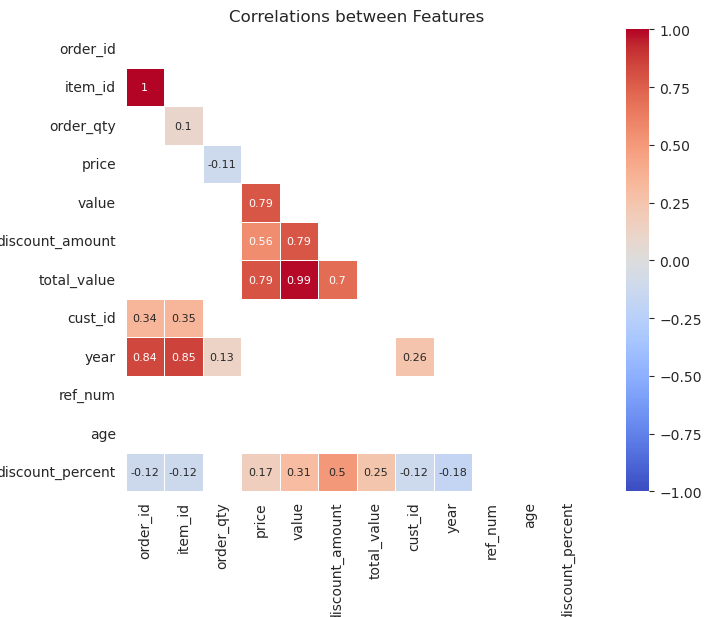

In [29]:
mask = np.zeros_like(completed_sales.corr(numeric_only=True))
mask[np.triu_indices_from(mask)] = True
mask[(completed_sales.corr(numeric_only=True) > -0.1) & (completed_sales.corr(numeric_only=True) < 0.1)] = True

plt.figure(figsize=(10, 6))
with sns.axes_style('white'):
    sns.heatmap(completed_sales.corr(numeric_only=True), mask=mask, square=True, annot=True, 
                vmin=-1, vmax=1, cmap='coolwarm',
                linewidths=.5, annot_kws={'size': 8})

plt.title('Correlations between Features');

All Category correlation heatmap analysis:
- There is positive correlation between order quantity and year suggesting growth in total order quantity which is a good sign albeit a weak positive.
- Price and order quantity has weak inverse correlation.  This provide some insight into Price Elasticity of Demand for products offered. A detailed price sensitivity study on each SKU is required to get good understanding of price impact on demand. 

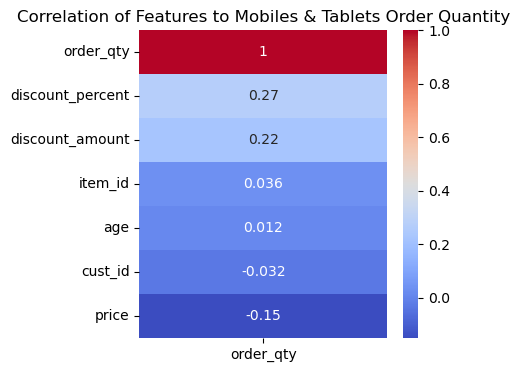

In [26]:
# Selected only Mobiles & Tablets order quantity
mobiles_sales = sales_df[(sales_df['order_status']=='complete') & (sales_df['category']=="Mobiles & Tablets")]

plt.figure(figsize=(4, 4))
heatmap = sns.heatmap(mobiles_sales.drop(columns=['order_id','year','value','total_value','ref_num'],).corr(numeric_only=True)[['order_qty']].sort_values(by='order_qty', ascending=False), 
                      annot=True, cmap='coolwarm')
plt.title('Correlation of Features to Mobiles & Tablets Order Quantity', fontsize=12)
plt.show()


Mobiles & Tablets correlation heatmap analysis:
- Positive correlation are between order quantity and discount percentage but they are considered weak positive.
- Price has the strongest inverse correlation with order quantity but still considered weak negative.
- The correlation between order quantity and other factors are weak. 